#### Births Modeler: &nbsp; Using Decision Trees and Random Forests

+ births clasification via decision trees and random forests...
+ You're classifying "above" (above-median popularity of birthdays) vs "below" (below-median popularity of birthdays)
+ Feel free to re-use the cleaned data from previous weeks (already here)
+ Suggestion:  &nbsp; go cell-by-cell using the iris_modeler example, copying-and-adapting as you go...

In [135]:
#
# hw6pr1births_modeler:  bday popularity modeling by month + day    
#                                                 (above/below median: 190942)
#

#
# SUGGESTION:  
# 
# +++ copy-paste-and-alter from the week6 iris-modeling notebook into here +++
#

## Data set up...
+ Use the cleaned data from prior weeks (it should be here in this folder as births_cleaned.csv)
+ Be sure to get rid of the column with the **number of births** &nbsp;&nbsp; That makes the prediction "too easy"!
+ Instead, see how well the DT/RF techniques can predict above/below-median popularity, just based on month and day...
+ (It's quite a hard estimation problem!)

In [136]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [137]:
# let's read in our flower data...
# 
# iris_cleaned.csv should be in this folder
# 
filename = 'births_cleaned.csv'
df_tidy1 = pd.read_csv(filename)      # encoding = "utf-8", "latin1"
print(f"{filename} : file read into a pandas dataframe.")

# drop births column
df_tidy2 = df_tidy1.drop(columns =  ['births'])
#
# function for converting above/below to 1/0
def abconvert(x):
    if x == 'above':
        return 1
    else:
        return 0

# create numerical above/below column
df_tidy2['abm num'] = df_tidy2['above/below median'].apply(abconvert)

# drop non numerical old above/below column
df_model1 = df_tidy2.drop(columns = ['above/below median'])
df_model1

births_cleaned.csv : file read into a pandas dataframe.


,month,day,abm num
0,2,29,0
1,12,25,0
2,1,1,0
3,12,24,0
4,1,2,0
...,...,...,...
361,9,17,1
362,9,24,1
363,9,22,1
364,9,23,1


In [138]:
#
# once we have all the columns we want, let's create an index of their names...

#
# Let's make sure we have all of our helpful variables in one place 
#       To be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#
COLUMNS = df_model1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")

#
# Feature names!
#
FEATURES = COLUMNS[0:2]

#
# and our "species" names
#

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   so, we will convert the flower-species to numbers:

SPECIES = ['below', 'above']   # int to str
SPECIES_INDEX = {'below':0,'above':1}  # str to int

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {SPECIES_INDEX[name]}")

COLUMNS is Index(['month', 'day', 'abm num'], dtype='object')

COLUMNS[0] is month

COL_INDEX is {'month': 0, 'day': 1, 'abm num': 2}


below maps to 0
above maps to 1


## First: &nbsp; _Decision Trees_

In [139]:
A = df_model1.to_numpy()   

A = A.astype('float64') 

print(A)

NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

[[ 2. 29.  0.]
 [12. 25.  0.]
 [ 1.  1.  0.]
 ...
 [ 9. 22.  1.]
 [ 9. 23.  1.]
 [ 9. 16.  1.]]

The dataset has 366 rows and 3 cols


In [140]:
# let's use all our variables, to reinforce that we have
# (1) their names...
# (2) access and control over each...

# choose a row index, n:
n = 47
print(f"day #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  Its {colname} is {value}")

species_index = COL_INDEX['abm num']
species_num = int(round(A[n][species_index]))
species = SPECIES[species_num]
print(f"  Its species is {species} (i.e., {species_num})")

day #47 is [ 1. 30.  0.]
  Its month is 1.0
  Its day is 30.0
  Its abm num is 0.0
  Its species is below (i.e., 0)


In [141]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:2]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,2]    # y (labels) ... is all rows, column 4 only

print(f"y_all (just the labels/species)   are \n {y_all}")
print(f"X_all (just the features, first few rows) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [142]:
#
# we scramble the data, to remove (potential) dependence on its ordering: 
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_permed = X_all[indices]              # we apply the _same_ permutation to each!
y_permed = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_permed}")
print(f"The corresponding data rows are \n {X_permed[0:5]}")

The scrambled labels/species are 
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 

In [143]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_permed, y_permed, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 292 rows;  testing with 74 rows

Held-out data... (testing data: 74)
y_test: [1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1.]

X_test (few rows): [[ 8. 25.]
 [12.  1.]
 [ 5. 14.]
 [ 2. 15.]
 [ 3. 30.]]

Data used for modeling... (training data: 292)
y_train: [1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0

In [144]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a DT model and train it! 
#
from sklearn import tree      # for decision trees

best_depth = 1   # we don't know what depth to use, so let's guess 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 1


In [145]:
#
# +++ This cell will "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = dtree_model.predict(X_test)   
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1.]
Actual  labels  : [1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1.]

Results on test set:  59 correct out of 74 total.


In [146]:
#
# Let's print these more helpfully, in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0
    
    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")   

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)

row   0 :        above above          
row   1 :        above above          
row   2 :        below below          
row   3 :        below below          
row   4 :        below below          
row   5 :        below below          
row   6 :        below below          
row   7 :        below below          
row   8 :        above below          incorrect
row   9 :        above above          
row  10 :        below above          incorrect
row  11 :        above above          
row  12 :        above below          incorrect
row  13 :        above above          
row  14 :        above below          incorrect
row  15 :        above below          incorrect
row  16 :        below above          incorrect
row  17 :        below below          
row  18 :        above above          
row  19 :        above above          
row  20 :        above above          
row  21 :        below below          
row  22 :        above below          incorrect
row  23 :        below above          in

59

In [147]:
#
# first, let's use text :)
#
text_representation = tree.export_text(dtree_model)
print(text_representation)

|--- feature_0 <= 5.50
|   |--- class: 0.0
|--- feature_0 >  5.50
|   |--- class: 1.0



In [148]:
#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES,   # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # Yay! we created this  
                            leaves_parallel=True )    # lots of options!

print(f"# file {filename} written. Try pasting its contents to  http://viz-js.com/")
print()

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

# file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="month <= 5.5\ngini = 0.5\nsamples = 292\nvalue = [145, 147]\nclass = above", fillcolor="#fcfeff"] ;
1 [label="gini = 0.213\nsamples = 124\nvalue = [109, 15]\nclass = below", fillcolor="#e99254"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.337\nsamples = 168\nvalue = [36, 132]\nclass = above", fillcolor="#6fb8ec"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


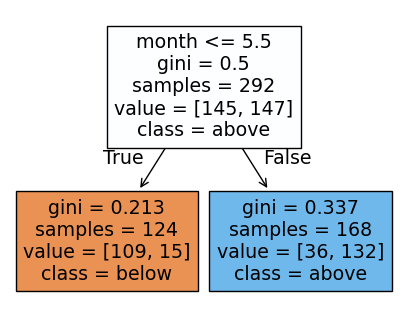

In [149]:
#
# Treeing!
#
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(5,4))              # Feel free to adjust this size...
tree_plot = tree.plot_tree(dtree_model, 
                   feature_names=FEATURES,   # Glad to have these FEATURES...
                   class_names=SPECIES,      # and these SPECIES...
                   filled=True)

In [150]:
#
# To compare different tree-depths, we use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1
best_accuracy = 0.0

for d in range(1,10+1):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # we usually don't want to see the five individual scores 
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")
    
    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_d = d

    
    
# assign best value of d to best_depth
best_depth = best_d   # may have to hand-tune this, depending on what happens...
print()
print(f"best_depth = {best_depth} with acc: {best_accuracy} is our balance.")
print()
print("Too deep and the tree will _overfit_ the training data.")
print("Too shallow and the tree will _underfit_ the training data.")

depth:  1  cv accuracy:  0.8252
depth:  2  cv accuracy:  0.7877
depth:  3  cv accuracy:  0.8458
depth:  4  cv accuracy:  0.8184
depth:  5  cv accuracy:  0.8049
depth:  6  cv accuracy:  0.7946
depth:  7  cv accuracy:  0.7946
depth:  8  cv accuracy:  0.8048
depth:  9  cv accuracy:  0.7843
depth: 10  cv accuracy:  0.7910

best_depth = 3 with acc: 0.8458211572180012 is our balance.

Too deep and the tree will _overfit_ the training data.
Too shallow and the tree will _underfit_ the training data.


In [151]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# this time, with the best depth, best_d, found by cross-validation model tuning:
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 3


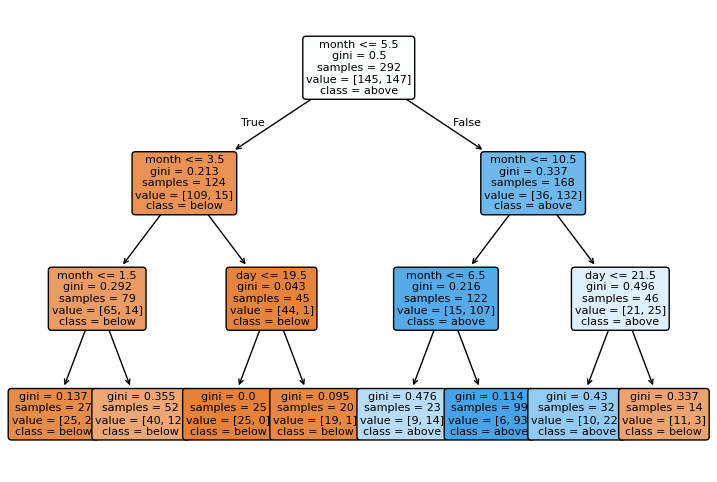

In [152]:
#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model_tuned, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!

# Use this line to print the tree to the console in the dot language:
# print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/")

# with open(filename, "r") as f:    # here, it will print to a file:
#     all_file_text = f.read()
#     print(all_file_text)

#
# Treeing using matplotlib:
#
fig = plt.figure(figsize=(9,6))
tree_plot = tree.plot_tree(dtree_model_tuned, 
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=SPECIES,      # and these!!
                   filled=True,
                   rounded=True,
                   fontsize=8)

In [153]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1.]
Actual labels: [1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1.]

row   0 :        above above          
row   1 :        above above          
row   2 :        below below          
row   3 :        below below          
row   4 :        below below          
row   5 :        below below          
row   6 :        below below          
row   7 :        below below          
row   8 :        above below          incorrect
row   9 :        above above          
row  10 :        below above          incorrect
row  11 :        above above          
row  12 :        above bel

60

In [154]:
print(dtree_model_tuned.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_tuned.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.94562207 0.05437793]

Feature        month has   94.56% of the decision-making importance.
Feature          day has    5.44% of the decision-making importance.


In [155]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth) 

Created and trained a 'final' DT classifier with max depth = 3


In [156]:
#
# final predictive model (decision trees), with tuned parameters + ALL data incorporated
#

def predictive_model( Features, Model ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species
   
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [6.7,3.3,5.7,0.1]  # [5.8,2.7,4.1,1.0] [4.6,3.6,3.0,2.2] [6.7,3.3,5.7,2.1]

LoD = [[10,4.2],
[1.5,1.5],
[2,-1],
[-10,0],
[0,0],
[2,32],
[9.2,6.5],
[3.14159,2.71828],
[42,42]]


# run on each one:
for Features in LoD:
    predicted_species = predictive_model( Features, dtree_model_final )  # pass in the model, too!
    name = SPECIES[predicted_species]
    print(f"I predict {name} from the features {Features}")    # Answers in the assignment...

I predict above from the features [10, 4.2]
I predict below from the features [1.5, 1.5]
I predict below from the features [2, -1]
I predict below from the features [-10, 0]
I predict below from the features [0, 0]
I predict below from the features [2, 32]
I predict above from the features [9.2, 6.5]
I predict below from the features [3.14159, 2.71828]
I predict below from the features [42, 42]


In [157]:
#
# feature importances!
# 
#     feature importances are computed by tracking which feature is used at each decision-point
#     weighted by how often that decision-point is checked 
# 
# feature importances are often even more "important" than predictions, 
#         because they invite the question, "why" (Here, not a computational, but a biological/botanical q'n)
#

print(dtree_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.95126802 0.04873198]

Feature        month has   95.13% of the decision-making importance.
Feature          day has    4.87% of the decision-making importance.


## Then: &nbsp; _Random Forests_

In [174]:
#
# +++ We're back at the "Model-building and Model-training Cell"
#       
# Create a RF model and train it! 
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier

best_d = 1            # we don't know what depth to use, so we guess...
best_num_trees = 47   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, 
                                                n_estimators=best_num_trees,
                                                max_samples=0.5)  
# This max_samples=0.5 is the fraction of rows to use for each DT 
# For all of our forests, we will let max_samples be 0.5   

# We'll explore best_d and best_num_trees...

# we train the model (again, one line):
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_d} and number of trees={best_num_trees}")  

Built an RF with depth=1 and number of trees=47


In [175]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1.]
Actual  labels  : [1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1.]

Results on test set:  59 correct out of 74 total.
row   0 :        above above          
row   1 :        above above          
row   2 :        below below          
row   3 :        below below          
row   4 :        below below          
row   5 :        below below          
row   6 :        below below          
row   7 :        below below          
row   8 :        above below          incorrect
row   9 :        above above          
row  10 :        below above          incorrect
row  11 :   

59

One of the forest's trees is DecisionTreeClassifier(max_depth=1, max_features='sqrt', random_state=268275662)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="day <= 9.5\ngini = 0.5\nsamples = 119\nvalue = [72, 74]\nclass = above", fillcolor="#fafcfe"] ;
1 [label="gini = 0.467\nsamples = 29\nvalue = [22, 13]\nclass = below", fillcolor="#f4cbae"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.495\nsamples = 90\nvalue = [50.0, 61.0]\nclass = above", fillcolor="#dbedfa"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


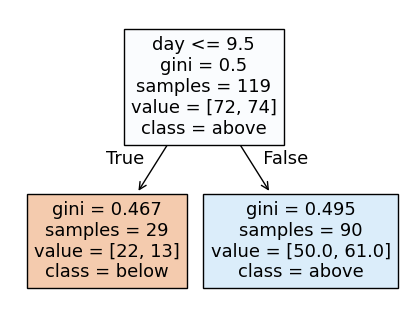

In [176]:
#
# we can get the individual trees, if we want...
#
tree_index = 28   # which tree
one_rf_tree = rforest_model.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here. 
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!
                            
print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

#
# Treeing!
#
fig = plt.figure(figsize=(5,4))
tree_plot = tree.plot_tree(one_rf_tree, 
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=SPECIES,      # and these!!
                   filled=True)

In [179]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#

best_d = 1         # range(1,6)
best_ntrees = 50   # [50,150,250]
best_accuracy = 0

for d in range(1,6):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, 
                                                        n_estimators=ntrees,
                                                        max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_d = d
            best_ntrees = ntrees

# 
# your task: assign best values by keeping a "running max"
#
best_depth = best_d   
best_num_trees = best_ntrees

# This will be incorrect when initially run (you'll fix it):
print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")  

#
# remember that the RF lab task is to complete this nested cross-validation loop!
#

depth:  1 ntrees:  50 cv accuracy:  0.8252
depth:  1 ntrees: 150 cv accuracy:  0.8252
depth:  1 ntrees: 250 cv accuracy:  0.8252
depth:  2 ntrees:  50 cv accuracy:  0.8217
depth:  2 ntrees: 150 cv accuracy:  0.8217
depth:  2 ntrees: 250 cv accuracy:  0.8183
depth:  3 ntrees:  50 cv accuracy:  0.8183
depth:  3 ntrees: 150 cv accuracy:  0.8149
depth:  3 ntrees: 250 cv accuracy:  0.8115
depth:  4 ntrees:  50 cv accuracy:  0.8252
depth:  4 ntrees: 150 cv accuracy:  0.8149
depth:  4 ntrees: 250 cv accuracy:  0.8184
depth:  5 ntrees:  50 cv accuracy:  0.8217
depth:  5 ntrees: 150 cv accuracy:  0.8321
depth:  5 ntrees: 250 cv accuracy:  0.8252

best_depth: 5 and best_num_trees: 150 are our choices. Acc: 0.832144944476914


In [178]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests
best_depth =  best_depth
best_num_trees = best_num_trees
# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=50


In [163]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1.]
Actual  labels  : [1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1.]

Results on test set:  64 correct out of 74 total.
row   0 :        above above          
row   1 :        below above          incorrect
row   2 :        below below          
row   3 :        below below          
row   4 :        below below          
row   5 :        below below          
row   6 :        below below          
row   7 :        below below          
row   8 :        below below          
row   9 :        above above          
row  10 :        below above          incorrect
row  11 :   

64

In [164]:
#
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=50


In [165]:
#
# final predictive model (random forests), with tuned parameters + ALL data incorporated
#

def predictive_model( Features, Model ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species
   
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [6.7,3.3,5.7,0.1]  # [5.8,2.7,4.1,1.0] [4.6,3.6,3.0,2.2] [6.7,3.3,5.7,2.1]

LoD = [[10,4.2],
[1.5,1.5],
[2,-1],
[-10,0],
[0,0],
[2,32],
[9.2,6.5],
[3.14159,2.71828],
[42,42]]


# run on each one:
for Features in LoD:
    predicted_species = predictive_model( Features, rforest_model_final )  # pass in the model, too!
    name = SPECIES[predicted_species]
    print(f"I predict {name} from the features {Features}")    # Answers in the assignment...

I predict above from the features [10, 4.2]
I predict below from the features [1.5, 1.5]
I predict below from the features [2, -1]
I predict below from the features [-10, 0]
I predict below from the features [0, 0]
I predict below from the features [2, 32]
I predict above from the features [9.2, 6.5]
I predict below from the features [3.14159, 2.71828]
I predict above from the features [42, 42]


In [166]:
#
# feature importances are often even more "important" than predictions...
#
#    Random forests can provide a much "smoother" measure of feature importance, since
#                   they integrate over so many individual models (each tree)
#
#    That is, it's much less likely that a feature will have 0% importance, unless it never varies
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.78386091 0.21613909]

Feature        month has   78.39% of the decision-making importance.
Feature          day has   21.61% of the decision-making importance.


In [170]:
# we can only plot 2 dimensions at a time! 
# These two will be our constants:

VERTICAL = np.arange(0,12,1) # array of vertical input values
HORIZONT = np.arange(0,31,1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = rforest_model_final

col = 0
row = 0
for month in VERTICAL: # for every sepal length
  for day in HORIZONT: # for every sepal width
    Features = [month, day]
    output = predictive_model(Features,MODEL)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")  # so we know it's running
  if col % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner

............
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


File tree_visualization.dot written. Try visualizing it with Graphviz or http://viz-js.com/


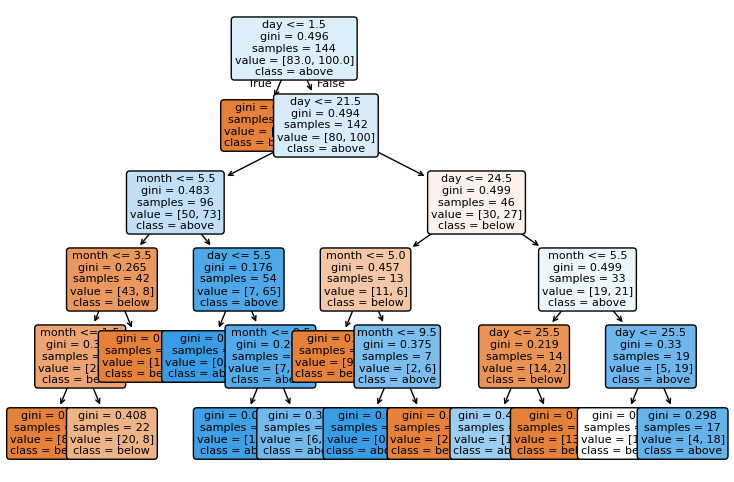

In [169]:
from sklearn import tree
import matplotlib.pyplot as plt

# Ensure these variables are defined
single_tree = rforest_model_final.estimators_[0]  # Extract the first tree
FEATURES = ['month', 'day']
SPECIES = ['below','above']

# Export the tree to a .dot file
filename = 'tree_visualization.dot'
tree.export_graphviz(single_tree, out_file=filename,
                     feature_names=FEATURES,
                     filled=True,
                     rotate=False,
                     class_names=SPECIES,
                     leaves_parallel=True)

print(f"File {filename} written. Try visualizing it with Graphviz or http://viz-js.com/")

# Plot the tree using matplotlib
fig = plt.figure(figsize=(9, 6))
tree_plot = tree.plot_tree(single_tree, 
                           feature_names=FEATURES,
                           class_names=SPECIES,
                           filled=True,
                           rounded=True,
                           fontsize=8)
plt.show()

Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


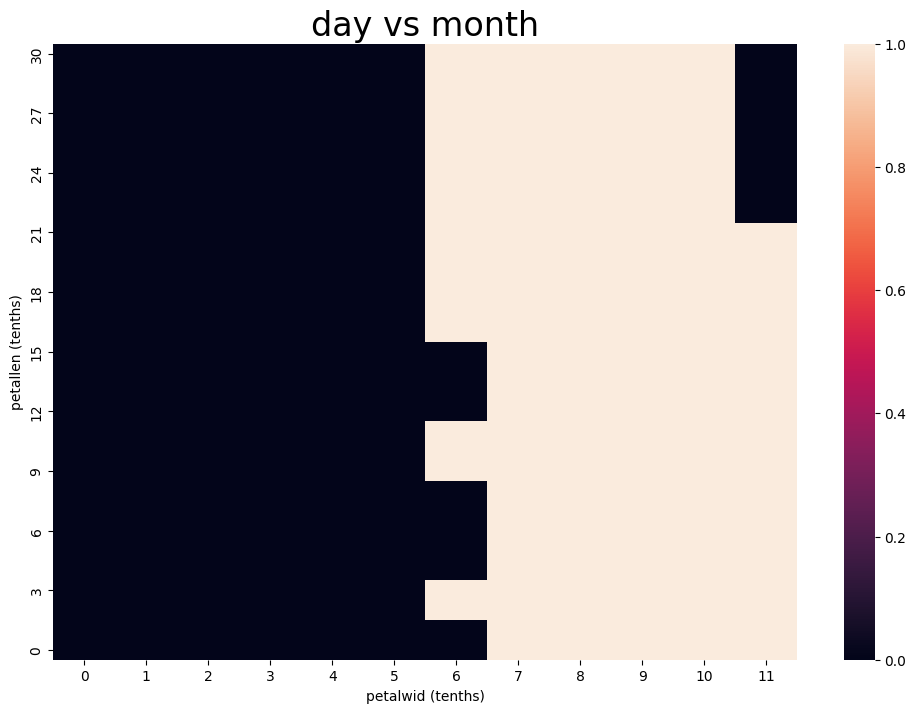

In [173]:
import seaborn as sns
# sns.heatmap(PLANE)

#sns.set(rc = {'figure.figsize':(18,12)})  # figure size!

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(PLANE)
ax.set_title(f"day vs month", fontsize=24)
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="petalwid (tenths)", ylabel="petallen (tenths)")
ax.set_xticks(ax.get_xticks()[::1])
ax.set_yticks(ax.get_yticks()[::3])


print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

<br>
<hr>
<br>

### Final, big-picture question:  
+ What are the relative "feature importances" of the two features
  + month
  + day
+ ... at least, in terms of "birthday popularity," as we've defined it?

Reflect, in a sentence or two, on the values of feature importances that you found.
+ To use Erica Thompson's framing, 
+ how much trust (or weight) would you attribute to this model and its feature importances, "outside of Model Land"? 

The relative importance of month is much greater than that of day in either model type (DT/RR) for birth popularity. Thinking about it, that makes sense, as day # doesn't even correlate with time of year, and at best, unique features in day data like holidays only impact 1/12 of the data points associated with day!

This model is better than the KNN model, as there is a believable birth trend associated with a month's place in the year (>=N or <=N), and this trend is better characterized with DT/RF than through proximity like with KNN. It can also weight month/day separately. However it's still not too great of a model mostly because of the data set itself. Not enough data points, not a strong enough existing trend to model. Any model therefore feels like an attempt to pretend there is more to the data than there actually is 😥